## Import Data

In [10]:
import os
import numpy as np
import pandas as pd
import csv
import sys
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from rdkit import Chem
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem import rdMolDescriptors as rd
import torch as th
import torch.nn.functional as fn


df = pd.read_csv('smiles_embeddings_all.csv')
df.head()

,Unnamed: 0,DrugBankID,SMILES,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,...,embedding_390,embedding_391,embedding_392,embedding_393,embedding_394,embedding_395,embedding_396,embedding_397,embedding_398,embedding_399
0,0,Compound::DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,-0.659347,-0.344230,-0.578348,-0.670077,0.073021,-0.844866,-0.529099,...,0.722160,-0.361777,-0.069529,0.719951,0.765324,-0.828312,-0.750704,-0.360401,-0.359896,-0.820253
1,1,Compound::DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,-0.606968,-0.781302,-0.730112,-0.868258,0.363371,-0.388290,0.217138,...,-0.355017,0.657896,0.039386,-0.395858,-0.218164,-0.540272,-0.603087,-0.853275,0.545669,-0.836144
2,2,Compound::DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,-0.470256,-0.885203,-0.623956,-0.507102,0.395201,-0.298908,-0.156826,...,-0.430036,0.563329,0.419391,-0.074537,0.266462,-0.631508,-0.637233,-0.816603,0.416263,-0.720862
3,3,Compound::DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,-0.761337,-0.709398,0.665223,-0.388625,0.218644,-0.416196,0.594226,...,-0.721291,0.630432,0.817134,0.515158,-0.247925,-0.523338,-0.827212,-0.751571,-0.640211,-0.756264
4,4,Compound::DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,-0.764784,-0.956786,-0.445434,-0.611626,0.335249,0.044306,-0.635370,...,-0.204678,-0.404126,-0.018485,-0.401169,0.025806,-0.664728,-0.856459,-0.417736,-0.386456,-0.626406


In [3]:
df.shape

(8807, 403)

In [4]:
# Drop the untitled column
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,DrugBankID,SMILES,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_390,embedding_391,embedding_392,embedding_393,embedding_394,embedding_395,embedding_396,embedding_397,embedding_398,embedding_399
0,Compound::DB00006,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,-0.659347,-0.344230,-0.578348,-0.670077,0.073021,-0.844866,-0.529099,-0.797582,...,0.722160,-0.361777,-0.069529,0.719951,0.765324,-0.828312,-0.750704,-0.360401,-0.359896,-0.820253
1,Compound::DB00007,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,-0.606968,-0.781302,-0.730112,-0.868258,0.363371,-0.388290,0.217138,-0.640213,...,-0.355017,0.657896,0.039386,-0.395858,-0.218164,-0.540272,-0.603087,-0.853275,0.545669,-0.836144
2,Compound::DB00014,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,-0.470256,-0.885203,-0.623956,-0.507102,0.395201,-0.298908,-0.156826,-0.697836,...,-0.430036,0.563329,0.419391,-0.074537,0.266462,-0.631508,-0.637233,-0.816603,0.416263,-0.720862
3,Compound::DB00027,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,-0.761337,-0.709398,0.665223,-0.388625,0.218644,-0.416196,0.594226,-0.497919,...,-0.721291,0.630432,0.817134,0.515158,-0.247925,-0.523338,-0.827212,-0.751571,-0.640211,-0.756264
4,Compound::DB00035,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,-0.764784,-0.956786,-0.445434,-0.611626,0.335249,0.044306,-0.635370,-0.706563,...,-0.204678,-0.404126,-0.018485,-0.401169,0.025806,-0.664728,-0.856459,-0.417736,-0.386456,-0.626406


## Split data into train and test set 
Store the data as a CSV file.

In [5]:
# Split the DataFrame into train and test sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Save the train and test sets to CSV files
# train_df.to_csv('train.csv', index=False)
# test_df.to_csv('test.csv', index=False)

## Morgan Fingerprint Count Model

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
RADIUS = 2
N_BITS = 2048

# Function to calculate Morgan fingerprint count
def calculate_morgan_fingerprint_count(smiles, radius=RADIUS, n_bits=N_BITS):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fingerprint = rd.GetHashedMorganFingerprint(mol, radius=radius, nBits=n_bits)
        arr = np.zeros((n_bits,), dtype=np.uint8)
        for idx, count in fingerprint.GetNonzeroElements().items():
            arr[idx] = count if count < 255 else 255
        return np.array(arr, dtype=np.uint8)
    else:
        return None

# Function to preprocess data and create embeddings
def preprocess_data(df):
    # Get the target embeddings
    embeddings = df.iloc[:, 2:].values
    # create fingerprint column
    df['morgan_fingerprint_count'] = df['SMILES'].apply(calculate_morgan_fingerprint_count)
    df = df.dropna()
    # Extract the fingerprints as a NumPy array
    morgan_fingerprints = np.array(df['morgan_fingerprint_count'].tolist())
    return morgan_fingerprints, embeddings

In [12]:
# The morgan_fingerprints is X, our features
# The embeddings is y, our target variable
X_train, y_train = preprocess_data(train_df)
X_test, y_test = preprocess_data(test_df)

print("The length of X_train is:", len(X_train))
print("The length of X_test is:", len(X_test))

[19:41:33] Unusual charge on atom 0 number of radical electrons set to zero


The length of X_train is: 7045
The length of X_test is: 1762


In [13]:
print(X_train.shape)
print(X_train)

(7045, 2048)
[[0 5 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


## Train Model with Keras Tuner

In [16]:
TUNER_PROJECT_NAME_A = "tuner_trials"


class TunerRegressorAutoTrainer(object):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.input_shape = X.shape[1]
        self.output_shape = y.shape[1]

    def _model_builder(self, hp):
        model = keras.Sequential()
        hp_units = hp.Int("units", min_value=32, max_value=512, step=32)
        model.add(
            keras.layers.Dense(
                units=hp_units,
                activation="relu", input_shape=(self.input_shape,)
            )
        )
        for i in range(hp.Int('layers', 1, 6)):
            model.add(
                keras.layers.Dense(
                    units=hp.Int("units_"+str(i), min_value=32, max_value=512, step=32),
                    activation="relu"
                )
            )
        model.add(keras.layers.Dense(self.output_shape))
        # Tune the learning rate for the optimizer
        # Choose an optimal value from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss="mean_squared_error",
            metrics=None,
        )

        return model

    def _search(self, X, y):
        self.tuner = kt.Hyperband(
            self._model_builder,
            objective="val_loss",
            max_epochs=10,
            factor=3,
            directory=TUNER_PROJECT_NAME_A,
            project_name="trials",
        )
        stop_early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
        self.tuner.search(
            X, y, epochs=50, validation_split=0.2, callbacks=[stop_early], verbose=True
        )
        self.best_hps = self.tuner.get_best_hyperparameters(num_trials=1)[0]

    def _get_best_epoch(self, X, y):
        # Build the model with the optimal hyperparameters and train it on the data for 50 epochs
        model = self.tuner.hypermodel.build(self.best_hps)
        history = model.fit(X, y, epochs=50, validation_split=0.2)

        val_per_epoch = history.history["val_loss"]
        self.best_epoch = val_per_epoch.index(min(val_per_epoch)) + 1
        print("Best epoch: %d" % (self.best_epoch,))

    def _final_train(self, X, y):
        self.hypermodel = self.tuner.hypermodel.build(self.best_hps)

        # Retrain the model
        self.hypermodel.fit(X, y, epochs=self.best_epoch, validation_split=0.2)

    def fit(self):
        self._search(self.X, self.y)
        self._get_best_epoch(self.X, self.y)
        self._final_train(self.X, self.y)
        self.hypermodel.save(os.path.join(TUNER_PROJECT_NAME_A, "mfc_model"))

    def export_model(self):
        return self.hypermodel

In [17]:
# Instantiate the model
trainer = TunerRegressorAutoTrainer(X_train, y_train)
# Train model
trainer.fit()

Reloading Tuner from tuner_trials/trials/tuner0.json
Epoch 1/50
177/177 [==============================] - 12s 62ms/step - loss: 0.2473 - val_loss: 0.2318
Epoch 2/50
177/177 [==============================] - 10s 57ms/step - loss: 0.2209 - val_loss: 0.2266
Epoch 3/50
177/177 [==============================] - 6s 35ms/step - loss: 0.2025 - val_loss: 0.2270
Epoch 4/50
177/177 [==============================] - 7s 40ms/step - loss: 0.1883 - val_loss: 0.2268
Epoch 5/50
177/177 [==============================] - 9s 50ms/step - loss: 0.1749 - val_loss: 0.2276
Epoch 6/50
177/177 [==============================] - 10s 59ms/step - loss: 0.1633 - val_loss: 0.2283
Epoch 7/50
177/177 [==============================] - 10s 59ms/step - loss: 0.1543 - val_loss: 0.2281
Epoch 8/50
177/177 [==============================] - 9s 50ms/step - loss: 0.1458 - val_loss: 0.2311
Epoch 9/50
177/177 [==============================] - 10s 59ms/step - loss: 0.1381 - val_loss: 0.2323
Epoch 10/50
177/177 [============

INFO:tensorflow:Assets written to: tuner_trials/mfc_model/assets


In [18]:
# # save the best model
model = trainer.export_model()

In [19]:
# load the saved model
model = keras.models.load_model("tuner_trials/mfc_model")

# predict the embeddings of the drug Morgan fingerprints
mfc_embeddings = model.predict(X_test)
print(mfc_embeddings)

56/56 [==============================] - 0s 5ms/step
[[-0.14063516  0.2410227  -0.15355474 ... -0.13199839  0.2892724
  -0.2019554 ]
 [ 0.16257317  0.2340422  -0.21401459 ...  0.21204121 -0.00576014
   0.10843316]
 [-0.1667328   0.38697246 -0.06604911 ...  0.04591466  0.14354056
   0.14764746]
 ...
 [ 0.05974831  0.16014677 -0.22149229 ... -0.0189135   0.12330751
  -0.23537132]
 [-0.03535616  0.13544561 -0.0479213  ... -0.05634676  0.1858752
  -0.14704514]
 [ 0.15206438  0.30233198 -0.1113749  ...  0.20095737 -0.01841963
   0.12515107]]


## Predict the Edge Score

In [20]:
COV_disease_list = [
'Disease::SARS-CoV2 E',
'Disease::SARS-CoV2 M',
'Disease::SARS-CoV2 N',
'Disease::SARS-CoV2 Spike',
'Disease::SARS-CoV2 nsp1',
'Disease::SARS-CoV2 nsp10',
'Disease::SARS-CoV2 nsp11',
'Disease::SARS-CoV2 nsp12',
'Disease::SARS-CoV2 nsp13',
'Disease::SARS-CoV2 nsp14',
'Disease::SARS-CoV2 nsp15',
'Disease::SARS-CoV2 nsp2',
'Disease::SARS-CoV2 nsp4',
'Disease::SARS-CoV2 nsp5',
'Disease::SARS-CoV2 nsp5_C145A',
'Disease::SARS-CoV2 nsp6',
'Disease::SARS-CoV2 nsp7',
'Disease::SARS-CoV2 nsp8',
'Disease::SARS-CoV2 nsp9',
'Disease::SARS-CoV2 orf10',
'Disease::SARS-CoV2 orf3a',
'Disease::SARS-CoV2 orf3b',
'Disease::SARS-CoV2 orf6',
'Disease::SARS-CoV2 orf7a',
'Disease::SARS-CoV2 orf8',
'Disease::SARS-CoV2 orf9b',
'Disease::SARS-CoV2 orf9c',
'Disease::MESH:D045169',
'Disease::MESH:D045473',
'Disease::MESH:D001351',
'Disease::MESH:D065207',
'Disease::MESH:D028941',
'Disease::MESH:D058957',
'Disease::MESH:D006517'
]

treatment = ['Hetionet::CtD::Compound:Disease','GNBR::T::Compound:Disease']


gamma = 12.0

def transE_l2(head, rel, tail):
    score = head + rel - tail
    return gamma - th.norm(score, p=2, dim=-1)


def edge_score(embeddings):
    '''Function to calculate the edge scores.

    Argument
    ---------
    embeddings (array). Array of size 400 containing 
            the embeddings of the SMILES molecule.

    Returns
    --------
    scores (tensor). Tensor showing the edge score for 
            each disease based on the drug_embeddings, relation_embeddings,
            and COVID_disease embeddings.
    '''
    
    # Load entity and relation mapping files
    entity_idmap_file = '../data/embed/entities.tsv'
    relation_idmap_file = '../data/embed/relations.tsv'

    # Get drugname/disease name to entity ID mappings
    entity_map = {}
    entity_id_map = {}
    relation_map = {}
    
    with open(entity_idmap_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['name', 'id'])
        for row_val in reader:
            entity_map[row_val['name']] = int(row_val['id'])
            entity_id_map[int(row_val['id'])] = row_val['name']

    with open(relation_idmap_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile, delimiter='\t', fieldnames=['name', 'id'])
        for row_val in reader:
            relation_map[row_val['name']] = int(row_val['id'])

    # Handle the ID mapping
    # drug_ids = [entity_map[drug] for drug in drug_list]
    disease_ids = [entity_map[disease] for disease in COV_disease_list]
    treatment_rid = [relation_map[treat] for treat in treatment]

    # Load embeddings
    entity_emb = np.load('../data/embed/DRKG_TransE_l2_entity.npy')
    rel_emb = np.load('../data/embed/DRKG_TransE_l2_relation.npy')

    # drug_ids = th.tensor(drug_ids).long()
    disease_ids = th.tensor(disease_ids).long()
    treatment_rid = th.tensor(treatment_rid)

    # Use our model's embeddings here
    drug_emb = th.tensor(embeddings)
    # drug_emb = th.tensor(entity_emb[drug_ids]) # get embeddings from knowledge graph
    
    treatment_embs = [th.tensor(rel_emb[rid]) for rid in treatment_rid]

    scores_per_disease = []
    for rid in range(len(treatment_embs)):
        treatment_emb=treatment_embs[rid]
        for disease_id in disease_ids:
            disease_emb = entity_emb[disease_id]
            score = fn.logsigmoid(transE_l2(drug_emb, treatment_emb, disease_emb))
            scores_per_disease.append(score)
            
    # Convert scores_per_disease to a list of tensors
    scores_tensors = [th.tensor(scores, dtype=th.float32) for scores in scores_per_disease]
    # Get the first combo edge score
    return scores_tensors[0]

    # # Ensure the list of tensors is not empty before calculating the max
    # if scores_tensors:
    #     # Stack the list of tensors along a new dimension (axis 0)
    #     scores_tensor = th.stack(scores_tensors, dim=0)
    #     # Calculate the maximum score for each drug along the existing dimension (axis 0)
    #     max_scores, _ = th.max(scores_tensor, dim=0)
    #     # Print the shape and content of the max_scores tensor
    #     print("Shape of max_scores:", max_scores.shape)
    #     # print("Maximum scores for each drug:", max_scores.tolist())  # Use .tolist() to get a Python list
    #     return max_scores
    # else:
    #     print("The list of tensors is empty.")
    #     return None

In [21]:
# y_test has the original embeddings
# Predict the original_edge_score
original_edge_score = edge_score(y_test)

# Predict the Morgan Fingerprint Count edge score
mfc_edge_score = edge_score(mfc_embeddings)

/tmp/ipykernel_13935/449694285.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores_tensors = [th.tensor(scores, dtype=th.float32) for scores in scores_per_disease]


In [22]:
mfc_edge_score

tensor([-3.1339, -3.5900, -3.6572,  ..., -2.9929, -3.6663, -4.0640])

In [23]:
original_edge_score

tensor([-7.0180, -6.4491, -6.4137,  ..., -6.0347, -5.3829, -6.3878])

## Plot result

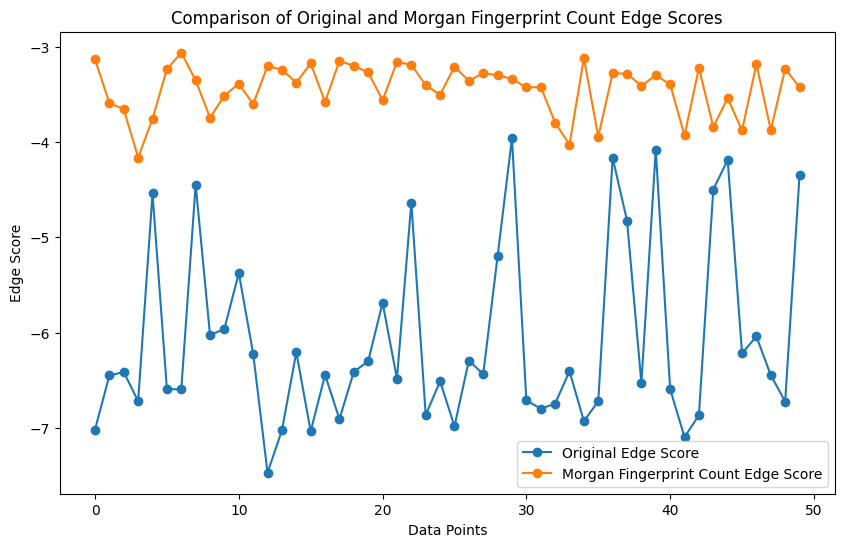

R-squared Score: -7.5834
Mean Squared Error: 7.1301


In [24]:
# Calculate R-squared score
r2 = r2_score(original_edge_score, mfc_edge_score)

# Calculate Mean Squared Error
mse = mean_squared_error(original_edge_score, mfc_edge_score)

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(original_edge_score[:50], label='Original Edge Score', marker='o')
plt.plot(mf_edge_score[:50], label='Morgan Fingerprint Count Edge Score', marker='o')
plt.title('Comparison of Original and Morgan Fingerprint Count Edge Scores')
plt.xlabel('Data Points')
plt.ylabel('Edge Score')
plt.legend()
plt.show()

# Print R-squared and MSE
print(f'R-squared Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

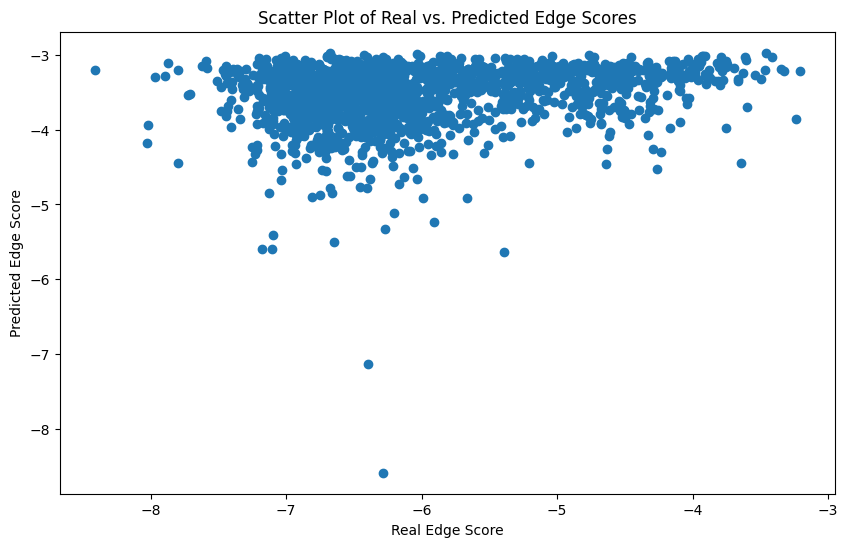

In [25]:
# Plot the scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x=original_edge_score, y=mfc_edge_score)
plt.title('Scatter Plot of Real vs. Predicted Edge Scores')
plt.xlabel('Real Edge Score')
plt.ylabel('Predicted Edge Score')
plt.show()